In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
print(os.getcwd())

e:\spending_analyzer\Student_spending_analyzer\notebooks


###  Load and prepare the data for EDA

In [3]:
##load the dataset

students=pd.read_csv("E:/spending_analyzer/Student_spending_analyzer/data/students.csv")
transactions=pd.read_csv("E:/spending_analyzer/Student_spending_analyzer/data/transactions.csv")

monthly_features=pd.read_csv("E:/spending_analyzer/Student_spending_analyzer/data/monthly_features.csv")


In [4]:
print(students.shape)
print(transactions.shape)
print(monthly_features.shape)

(300, 6)
(80000, 16)
(1200, 16)


In [5]:
transactions

,transaction_id,user_id,account_id,date,timestamp,amount,transaction_type,category,merchant,is_weekend,is_recurring,recurring_id,balance_after,note,data_quality_flag,year_month
0,2f3cd9ea-2611-4f15-8c1e-1d4da52c3c41,U00066,A00066,2025-08-01,2025-08-01T08:01:07+05:30,21409.72,credit,other,Family Transfer,False,False,NaN,-122971.14,Monthly allowance,ok,2025-08
1,35cbff9c-1e43-4256-8ccc-6b0b44f11552,U00114,A00114,2025-08-02,2025-08-02T06:51:18+05:30,-5755.80,debit,rent,Hostel Fee,True,True,RENT_U00114,70230.57,Monthly rent,ok,2025-08
2,a5652d5f-8455-423b-8cfb-618e848372b3,U00101,A00101,2025-08-01,2025-08-01T06:09:59+05:30,-185.42,debit,food,Campus Canteen,False,False,NaN,38701.17,NaN,ok,2025-08
3,de37568b-1a56-47d4-a27e-dda47b40e797,U00245,A00245,2025-08-01,2025-08-01T06:17:43+05:30,-1682.95,debit,academic,Lab Fee,False,False,NaN,155988.37,NaN,ok,2025-08
4,b61d3a54-2d82-4dbd-8948-9626153a3bfb,U00114,A00114,2025-08-01,2025-08-01T06:00:16+05:30,-75.49,debit,travel,Bus Pass,False,False,NaN,53766.73,NaN,ok,2025-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,0325cc28-f820-4e54-a98c-ddbcd7e4dbcc,U00275,A00275,2025-11-13,2025-11-13T10:57:40+05:30,-439.97,debit,entertainment,Amazon Prime,False,False,NaN,-29359.26,NaN,ok,2025-11
79996,7936284a-81dd-497d-bb20-ac9d37d95f35,U00188,A00188,2025-11-13,2025-11-13T10:59:12+05:30,-277.60,debit,groceries,Local Kirana,False,False,NaN,-54929.45,Manual entry,ok,2025-11
79997,277af6e1-fee8-49c8-ae0e-4d9ed2f20f04,U00273,A00273,2025-11-13,2025-11-13T10:59:49+05:30,-81.37,debit,travel,Local Auto,False,False,NaN,59900.31,Manual entry,ok,2025-11
79998,e7a2d8fc-1140-4ce3-a840-7180a5acc10d,U00267,A00267,2025-11-13,2025-11-13T11:00:49+05:30,-181.39,debit,food,Chai Point,False,False,NaN,109863.86,NaN,ok,2025-11


In [6]:
transactions.transaction_id.nunique() #this means there are 3 duplicate transaction ids in the transactions dataset

79997

In [14]:
monthly_features

,user_id,year_month,total_spend,total_income,spend_food,spend_rent,spend_academic,spend_groceries,avg_daily_spend,median_transaction,max_transaction,num_transactions,weekend_spend_ratio,recurring_share,savings_rate,label_anomalous
0,U00001,2025-08,28528.74,11311.28,4198.38,5432.92,10292.01,2486.92,950.96,220.02,5432.92,90,0.2966,0.1904,-1.5221,False
1,U00001,2025-09,20236.59,11311.28,2090.17,4190.97,7765.88,1298.64,778.33,183.24,4190.97,69,0.3366,0.2071,-0.7891,False
2,U00001,2025-10,25513.64,11311.28,3016.05,5049.40,5137.71,3106.34,981.29,208.14,5049.40,82,0.2476,0.1979,-1.2556,False
3,U00001,2025-11,16845.85,11311.28,2183.84,8471.23,1917.54,561.42,1531.44,235.83,8471.23,36,0.7649,0.5029,-0.4893,False
4,U00002,2025-08,33279.90,22874.75,8927.87,6284.27,9426.92,4004.54,1109.33,187.92,6284.27,108,0.1548,0.1888,-0.4549,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,U00299,2025-11,2405.68,10876.91,209.13,0.00,313.78,369.99,240.57,114.40,409.56,17,0.3958,0.0000,0.7788,False
1196,U00300,2025-08,13401.21,13907.75,750.32,4590.61,2283.26,1978.08,582.66,149.26,4590.61,47,0.1669,0.3426,0.0364,False
1197,U00300,2025-09,12227.12,13907.75,351.93,4237.84,2285.03,1450.09,531.61,134.44,4237.84,47,0.4578,0.3466,0.1208,False
1198,U00300,2025-10,14736.92,13907.75,721.10,4186.89,3326.75,2431.94,508.17,106.82,4186.89,60,0.1633,0.2841,-0.0596,False


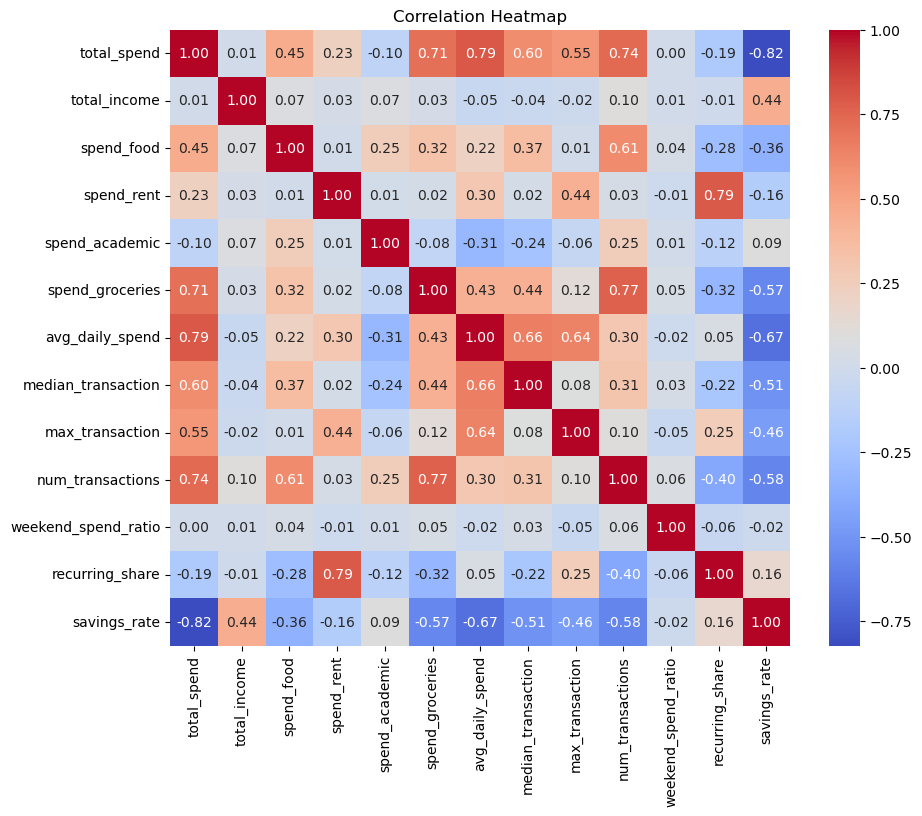

In [13]:
num_df = monthly_features.select_dtypes(include="number")

# correlation
corr = num_df.corr()

# plot
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [7]:
students

,user_id,accommodation,has_scholarship,has_internship,persona,expected_monthly_income
0,U00001,shared_flat,False,False,normal,11311.28
1,U00002,hostel_pg,False,False,foodie,22874.75
2,U00003,hostel_pg,False,True,normal,22902.65
3,U00004,hostel_pg,True,False,bigspender,19467.19
4,U00005,with_parents,True,False,normal,24871.38
...,...,...,...,...,...,...
295,U00296,hostel_pg,False,False,foodie,10966.76
296,U00297,alone,False,False,bigspender,17407.52
297,U00298,with_parents,False,False,normal,15832.28
298,U00299,with_parents,False,False,saver,10876.91


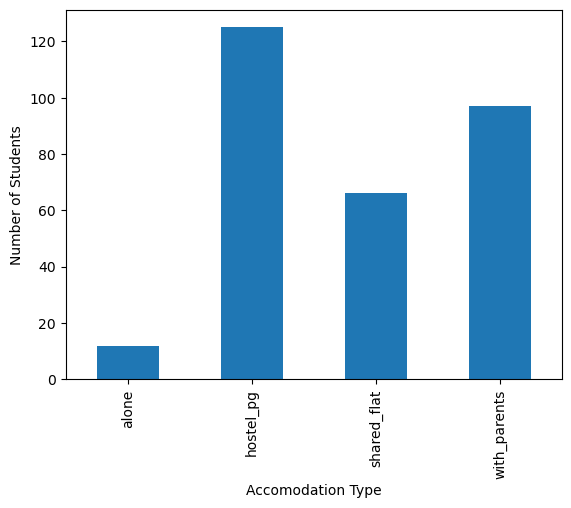

In [11]:
students_counts = students.groupby('accommodation').size()
students_counts.plot(kind="bar")
plt.xlabel("Accomodation Type")
plt.ylabel("Number of Students")
plt.show()


In [42]:
monthly_features

,user_id,year_month,total_spend,total_income,spend_food,spend_rent,spend_academic,spend_groceries,avg_daily_spend,median_transaction,max_transaction,num_transactions,weekend_spend_ratio,recurring_share,savings_rate,label_anomalous
0,U00001,2025-08,28528.74,11311.28,4198.38,5432.92,10292.01,2486.92,950.96,220.02,5432.92,90,0.2966,0.1904,-1.5221,False
1,U00001,2025-09,20236.59,11311.28,2090.17,4190.97,7765.88,1298.64,778.33,183.24,4190.97,69,0.3366,0.2071,-0.7891,False
2,U00001,2025-10,25513.64,11311.28,3016.05,5049.40,5137.71,3106.34,981.29,208.14,5049.40,82,0.2476,0.1979,-1.2556,False
3,U00001,2025-11,16845.85,11311.28,2183.84,8471.23,1917.54,561.42,1531.44,235.83,8471.23,36,0.7649,0.5029,-0.4893,False
4,U00002,2025-08,33279.90,22874.75,8927.87,6284.27,9426.92,4004.54,1109.33,187.92,6284.27,108,0.1548,0.1888,-0.4549,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,U00299,2025-11,2405.68,10876.91,209.13,0.00,313.78,369.99,240.57,114.40,409.56,17,0.3958,0.0000,0.7788,False
1196,U00300,2025-08,13401.21,13907.75,750.32,4590.61,2283.26,1978.08,582.66,149.26,4590.61,47,0.1669,0.3426,0.0364,False
1197,U00300,2025-09,12227.12,13907.75,351.93,4237.84,2285.03,1450.09,531.61,134.44,4237.84,47,0.4578,0.3466,0.1208,False
1198,U00300,2025-10,14736.92,13907.75,721.10,4186.89,3326.75,2431.94,508.17,106.82,4186.89,60,0.1633,0.2841,-0.0596,False


In [43]:
print(students.info())
print("\n")
print(transactions.info())
print("\n")
print(monthly_features.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  300 non-null    object 
 1   accommodation            300 non-null    object 
 2   has_scholarship          300 non-null    bool   
 3   has_internship           300 non-null    bool   
 4   persona                  300 non-null    object 
 5   expected_monthly_income  300 non-null    float64
dtypes: bool(2), float64(1), object(3)
memory usage: 10.1+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   transaction_id     80000 non-null  object 
 1   user_id            80000 non-null  object 
 2   account_id         80000 non-null  object 
 3   date               80000 non-null  object

### Observation no 1

We have 
- 300 users
- 80,000 transactions
- 1,200 monthly rows

1,200 / 300 = 4 months per user

dataset likely spans 4 months per student.

In [44]:
students["user_id"].nunique()

300

In [45]:
students["expected_monthly_income"].describe()

count      300.000000
mean     18859.290767
std       6349.319171
min       5017.820000
25%      14123.572500
50%      17971.695000
75%      22877.912500
max      50132.010000
Name: expected_monthly_income, dtype: float64

In [46]:
transactions["date"]=pd.to_datetime(transactions["date"])
transactions["timestamp"]= pd.to_datetime(transactions["timestamp"])
#Because behavior = time.
#And time must be handled correctly
transactions.dtypes

transaction_id                          object
user_id                                 object
account_id                              object
date                            datetime64[ns]
timestamp            datetime64[ns, UTC+05:30]
amount                                 float64
transaction_type                        object
category                                object
merchant                                object
is_weekend                                bool
is_recurring                              bool
recurring_id                            object
balance_after                          float64
note                                    object
data_quality_flag                       object
year_month                              object
dtype: object

In [47]:
#how many transactions per user 

transactions.groupby("user_id").size().describe()

count    300.000000
mean     266.666667
std       56.518345
min      168.000000
25%      230.000000
50%      262.500000
75%      291.000000
max      428.000000
dtype: float64

### Observation no 2

- Total users = 300 
- Mean transactions per user = 266.67, so on average each user has ~267 transactions.
- Check total transactions: 266.67 X 300=80,000 — this exactly matches our transactions table size, so the grouping result is consistent with the raw row count.
- Median = 262.5 is slightly below the mean, so the distribution is mildly right‑skewed (a few users with higher counts pull the mean up).
- Std = 56.52 gives a coefficient of variation approx 0.212 (std/mean), meaning per‑user counts vary by ~21% relative to the mean.
- Range = 168 → 428 — users at the low and high ends differ by ~2.6×, so there are meaningful extremes to investigate.


In [48]:
transactions["amount"].describe()

count    80000.000000
mean       -17.519584
std       2633.591485
min     -79848.290000
25%       -326.790000
50%       -186.040000
75%       -105.077500
max      50132.010000
Name: amount, dtype: float64

In [49]:
transactions["amount"].quantile([0.01, 0.05, 0.95, 0.99])

0.01    -3264.3568
0.05     -815.5120
0.95      -41.4700
0.99    15024.6200
Name: amount, dtype: float64

### Observation no 3

- 0.01 → -3264.36
1% of transactions have amount ≤ -3264.36. These are the extreme negative tail (largest outflows if negative means outflow).
- 0.05 → -815.51
5% of transactions have amount ≤ -815.51.
- 0.95 → -41.47
95% of transactions have amount ≤ -41.47. Equivalently, only 5% of transactions are greater than -41.47.
- 0.99 → 15024.62
99% of transactions have amount ≤ 15024.62. The top 1% of transactions are larger than 15024.62 (large positive values).


In [29]:
transactions["category"].value_counts()

category
food             21935
travel           12060
groceries        11864
academic          9631
entertainment     9195
other             9039
utilities         3055
ecommerce         2408
rent               813
Name: count, dtype: int64

In [30]:
transactions["is_recurring"].value_counts()


is_recurring
False    79187
True       813
Name: count, dtype: int64

In [31]:
transactions["data_quality_flag"].value_counts()
# If some rows are flagged as low quality: You may need to exclude them later.

data_quality_flag
ok    80000
Name: count, dtype: int64

In [50]:
transactions["transaction_type"].value_counts()

transaction_type
debit     78543
credit     1457
Name: count, dtype: int64

In [51]:
transactions.groupby("transaction_type")["amount"].describe()

,count,mean,std,min,25%,50%,75%,max
transaction_type,,,,,,,,
credit,1457.0,16618.975896,7494.105778,3034.72,11134.04,16145.22,21409.720,50132.01
debit,78543.0,-326.132368,890.958957,-79848.29,-330.70,-189.64,-109.145,-10.00



For anomaly detection about overspending,
we must ONLY analyze:

debit transactions

If we include credit:

- Income spikes will confuse the model

- Monthly sums will cancel out

- Spending behavior becomes distorted

In [52]:
#isolate expense behavior
#Keeps only debit rows
#Converts negative values to positive for easier interpretation

expenses = transactions[transactions["transaction_type"] == "debit"].copy()  #- creates a Boolean mask: True for rows where the column transaction_type equals "debit", False otherwise.
expenses["amount"] = expenses["amount"].abs()


In [54]:
expenses.head()

,transaction_id,user_id,account_id,date,timestamp,amount,transaction_type,category,merchant,is_weekend,is_recurring,recurring_id,balance_after,note,data_quality_flag,year_month
1,35cbff9c-1e43-4256-8ccc-6b0b44f11552,U00114,A00114,2025-08-02,2025-08-02 06:51:18+05:30,5755.80,debit,rent,Hostel Fee,True,True,RENT_U00114,70230.57,Monthly rent,ok,2025-08
2,a5652d5f-8455-423b-8cfb-618e848372b3,U00101,A00101,2025-08-01,2025-08-01 06:09:59+05:30,185.42,debit,food,Campus Canteen,False,False,NaN,38701.17,NaN,ok,2025-08
3,de37568b-1a56-47d4-a27e-dda47b40e797,U00245,A00245,2025-08-01,2025-08-01 06:17:43+05:30,1682.95,debit,academic,Lab Fee,False,False,NaN,155988.37,NaN,ok,2025-08
4,b61d3a54-2d82-4dbd-8948-9626153a3bfb,U00114,A00114,2025-08-01,2025-08-01 06:00:16+05:30,75.49,debit,travel,Bus Pass,False,False,NaN,53766.73,NaN,ok,2025-08
5,8c954cb0-09d1-4879-895e-041febb91acb,U00071,A00071,2025-08-01,2025-08-01 06:11:24+05:30,146.70,debit,food,KFC,False,False,NaN,69425.66,NaN,ok,2025-08


In [55]:
expenses.shape

(78543, 16)

In [56]:
expenses["amount"].quantile([0.90, 0.95, 0.99])

0.90     565.7540
0.95     823.9480
0.99    3330.9642
Name: amount, dtype: float64

90th percentile ≈ 566

→ 90% of expenses are below ₹566

95th percentile ≈ 824

→ 95% are below ₹824

99th percentile ≈ 3,330

→ Top 1% jump sharply

In [57]:
expenses.sort_values("amount",ascending=False).head(10)[["user_id", "date", "amount", "category"]]

,user_id,date,amount,category
32862,U00244,2025-09-12,79848.29,ecommerce
79490,U00139,2025-11-12,79686.29,ecommerce
9898,U00244,2025-08-13,77742.46,ecommerce
32773,U00185,2025-09-12,67596.12,ecommerce
56118,U00085,2025-10-12,62875.34,ecommerce
64239,U00244,2025-10-23,52762.38,ecommerce
33607,U00272,2025-09-13,46755.63,ecommerce
38533,U00216,2025-09-19,40695.68,ecommerce
19264,U00186,2025-08-25,36543.56,ecommerce
25739,U00116,2025-09-02,23152.34,rent


Transaction-level anomaly detection will constantly flag ecommerce purchases.
But that may not indicate risky behavior.

Anomaly detection at monthly or rolling window level is more stable than per-transaction.

In [59]:
#Monthly spending per user

monthly_spend=(
    expenses
    .groupby(["user_id","year_month"])["amount"]
    .sum()
    .reset_index()
)

monthly_spend.head()

#This aggregates expenses per user per month





,user_id,year_month,amount
0,U00001,2025-08,28528.74
1,U00001,2025-09,20236.59
2,U00001,2025-10,25513.64
3,U00001,2025-11,16845.85
4,U00002,2025-08,33279.90


In [60]:
monthly_spend.groupby("user_id").size().describe()

count    300.0
mean       4.0
std        0.0
min        4.0
25%        4.0
50%        4.0
75%        4.0
max        4.0
dtype: float64

Every single user has:

- Exactly 4 months of data

- No missing months

- No sparse users

- Perfectly balanced structure

With only 4 months, anomaly detection must be simple.

Deep time-series models are unnecessary.

In [61]:
monthly_spend["amount"].describe()


count      1200.000000
mean      21346.178808
std       13735.737702
min        2145.290000
25%       13432.632500
50%       18786.635000
75%       24519.705000
max      127009.190000
Name: amount, dtype: float64

Count = 1200

→ 300 users × 4 months (consistent)

Mean ≈ ₹21,346

Median ≈ ₹18,786

Mean > Median → right-skewed (some high spenders)

Monthly spending varies a lot across users.
this tells us:

Global threshold anomaly detection will fail.

Example:

- ₹40,000 may be normal for one student

- ₹40,000 may be extreme for another

Therefore:
Anomaly detection must be per user
Baseline must be personalized

In [ ]:
#How much does each user fluctuate month-to-month?
#For each user, compute:
#Standard deviation of their monthly spending across 4 months.

user_variability = (
    monthly_spend
    .groupby("user_id")["amount"]
    .std()
)

user_variability.describe()

count      300.000000
mean      7697.066843
std       6203.807777
min       1308.615069
25%       4630.707399
50%       6016.111516
75%       7512.296431
max      47911.498657
Name: amount, dtype: float64

We cannot use a single anomaly threshold for all users.

Example:

User A:

- Monthly spend: 18k, 19k, 17k, 18k
- Std ≈ small → stable behavior

User B:

- Monthly spend: 10k, 40k, 15k, 35k
- Std ≈ large → naturally volatile

If we use same anomaly rule:

- we will over-flag stable users
- Under-flag volatile users

Therefore:
Anomaly detection must consider user-specific variability.


## Designing anomaly logic.

What does “normal monthly spending” mean for a user?

For each user:
- They have 4 months.
- We compare current month to previous months.
- Anomaly = significant deviation from personal baseline.

In [ ]:
#Compute User Mean & Std
#Personal mean monthly spend
#Personal variability

user_stats = (
    monthly_spend
    .groupby("user_id")["amount"]
    .agg(["mean", "std"])
    .reset_index()
)

user_stats.head()

,user_id,mean,std
0,U00001,22781.2050,5234.623962
1,U00002,25400.5200,6478.917927
2,U00003,21102.8825,6149.768402
3,U00004,41776.5225,18546.523079
4,U00005,15975.0475,7011.054526


For each user:

mean → Their typical monthly spending

std → How much they naturally fluctuate

Example:

U00001

- Mean ≈ 22,781

- Std ≈ 5,234

That means:
Most months for U00001 are around:
22,781 ± 5,234

So roughly between:
~17k and ~28k

### Defining anomaly

Z-score = (current_month - user_mean) / user_std

if:
- Z-score > threshold → anomaly

Stable user → small std → sensitive detection

Volatile user → large std → tolerant detection

In [64]:
#Merge Stats Back Into Monthly Data

monthly_with_stats = monthly_spend.merge(user_stats, on="user_id")
monthly_with_stats.head()

,user_id,year_month,amount,mean,std
0,U00001,2025-08,28528.74,22781.205,5234.623962
1,U00001,2025-09,20236.59,22781.205,5234.623962
2,U00001,2025-10,25513.64,22781.205,5234.623962
3,U00001,2025-11,16845.85,22781.205,5234.623962
4,U00002,2025-08,33279.90,25400.520,6478.917927


In [ ]:
## Lets now compute Z-score (monthly deviation)

monthly_with_stats["z_score"] = (
    (monthly_with_stats["amount"] - monthly_with_stats["mean"])
    / monthly_with_stats["std"]
)

monthly_with_stats.head()


,user_id,year_month,amount,mean,std,z-score,z_score
0,U00001,2025-08,28528.74,22781.205,5234.623962,28524.387977,1.097984
1,U00001,2025-09,20236.59,22781.205,5234.623962,20232.237977,-0.486112
2,U00001,2025-10,25513.64,22781.205,5234.623962,25509.287977,0.521993
3,U00001,2025-11,16845.85,22781.205,5234.623962,16841.497977,-1.133865
4,U00002,2025-08,33279.90,25400.520,6478.917927,33275.979512,1.216157


In statistics:

- |z| > 1 → mild deviation
- |z| > 2 → strong deviation
- |z| > 3 → very rare

In our EDA we found that we have 4 months per user
lets test threshold = 2 first

In [69]:
monthly_with_stats["is_anomaly"] = monthly_with_stats["z_score"].abs() > 2
monthly_with_stats["is_anomaly"].value_counts()


is_anomaly
False    1200
Name: count, dtype: int64

Zero anomalies.
Not a single month deviates more than 2 standard deviations.

sample size is small:

- Std adapts to extremes
- Extreme values inflate std
- Z-scores shrink

Because we computed:

- mean using all 4 months
- std using all 4 months

If one month is unusually high:

1. That high month raises the mean
2. It also inflates the standard deviation
3. Then when we compute z-score for that same month,
it is being compared against a baseline that already includes it

So the deviation cancels itself out.



We asked the month, “Are you unusual compared to a group that already includes you?”

Of course it won’t look extreme.

This is called data leakage into baseline .

In real alert systems:
We will never compare today against statistics that include today.
We will compare today against past only.

In [ ]:
monthly_with_stats = monthly_with_stats.sort_values(["user_id", "year_month"])
monthly_with_stats.head(8)


,user_id,year_month,amount,mean,std,z-score,z_score,is_anomaly
0,U00001,2025-08,28528.74,22781.205,5234.623962,28524.387977,1.097984,False
1,U00001,2025-09,20236.59,22781.205,5234.623962,20232.237977,-0.486112,False
2,U00001,2025-10,25513.64,22781.205,5234.623962,25509.287977,0.521993,False
3,U00001,2025-11,16845.85,22781.205,5234.623962,16841.497977,-1.133865,False
4,U00002,2025-08,33279.90,25400.520,6478.917927,33275.979512,1.216157,False
5,U00002,2025-09,23691.21,25400.520,6478.917927,23687.289512,-0.263826,False
6,U00002,2025-10,26891.94,25400.520,6478.917927,26888.019512,0.230196,False
7,U00002,2025-11,17739.03,25400.520,6478.917927,17735.109512,-1.182526,False


In [75]:
#Computing Rolling Historical Mean

monthly_with_stats["hist_mean"] = (
    monthly_with_stats
    .groupby("user_id")["amount"]
    .apply(lambda x: x.expanding().mean().shift(1))
    .reset_index(level=0, drop=True)
)

monthly_with_stats[["user_id", "year_month", "amount", "hist_mean"]].head(8)


,user_id,year_month,amount,hist_mean
0,U00001,2025-08,28528.74,NaN
1,U00001,2025-09,20236.59,28528.740000
2,U00001,2025-10,25513.64,24382.665000
3,U00001,2025-11,16845.85,24759.656667
4,U00002,2025-08,33279.90,NaN
5,U00002,2025-09,23691.21,33279.900000
6,U00002,2025-10,26891.94,28485.555000
7,U00002,2025-11,17739.03,27954.350000


For U00001:

- Aug → NaN (no history yet)
- Sep → baseline = 28,528.74 (only Aug available)
- Oct → baseline = mean(Aug, Sep) = 24,382.67
- Nov → baseline = mean(Aug, Sep, Oct) = 24,759.66

In [92]:
""".expanding()

. Creates an expanding window object over the Series.
· Unlike rolling windows, expanding windows start at the first element
and grow by one each step.

[a, b, c, d], the expanding windows are
[a, b, c, d]

Example: for values
[a, b]], [a, b, c]

[a]

mini example:

import pandas as pd
s = pd.Series([10, 12, 15, 20])

s.expanding().std()
# 0    NaN        # std of [10] is undefined
# 1    1.414214   # std of [10,12]
# 2    2.516611   # std of [10,12,15]
# 3    4.349329   # std of [10,12,15,20]

s.expanding().std().shift(1)
# 0    NaN        # shifted down
# 1    NaN
# 2    1.414214
# 3    2.516611"""

'.expanding()\n\n. Creates an expanding window object over the Series.\n· Unlike rolling windows, expanding windows start at the first element\nand grow by one each step.\n\n[a, b, c, d], the expanding windows are\n[a, b, c, d]\n\nExample: for values\n[a, b]], [a, b, c]\n\n[a]\n\nmini example:\n\nimport pandas as pd\ns = pd.Series([10, 12, 15, 20])\n\ns.expanding().std()\n# 0    NaN        # std of [10] is undefined\n# 1    1.414214   # std of [10,12]\n# 2    2.516611   # std of [10,12,15]\n# 3    4.349329   # std of [10,12,15,20]\n\ns.expanding().std().shift(1)\n# 0    NaN        # shifted down\n# 1    NaN\n# 2    1.414214\n# 3    2.516611'

In [ ]:
#Computing Rolling historical standard deviation

monthly_with_stats["hist_std"] = (
    monthly_with_stats
    .groupby("user_id")["amount"]
    .apply(lambda x: x.expanding().std().shift(1)) # to avoid data leakage
    .reset_index(level=0, drop=True)
)

monthly_with_stats[["user_id", "year_month", "amount", "hist_mean", "hist_std"]].head(8)



,user_id,year_month,amount,hist_mean,hist_std
0,U00001,2025-08,28528.74,NaN,NaN
1,U00001,2025-09,20236.59,28528.740000,NaN
2,U00001,2025-10,25513.64,24382.665000,5863.435496
3,U00001,2025-11,16845.85,24759.656667,4197.178345
4,U00002,2025-08,33279.90,NaN,NaN
5,U00002,2025-09,23691.21,33279.900000,NaN
6,U00002,2025-10,26891.94,28485.555000,6780.227722
7,U00002,2025-11,17739.03,27954.350000,4881.831648


In [ ]:
# Computing historical Z-score
monthly_with_stats["hist_z"] = (
    (monthly_with_stats["amount"] - monthly_with_stats["hist_mean"])
    / monthly_with_stats["hist_std"]
)

monthly_with_stats[
    ["user_id", "year_month", "amount", "hist_mean", "hist_std", "hist_z"]
].head(8)


,user_id,year_month,amount,hist_mean,hist_std,hist_z
0,U00001,2025-08,28528.74,NaN,NaN,NaN
1,U00001,2025-09,20236.59,28528.740000,NaN,NaN
2,U00001,2025-10,25513.64,24382.665000,5863.435496,0.192886
3,U00001,2025-11,16845.85,24759.656667,4197.178345,-1.885506
4,U00002,2025-08,33279.90,NaN,NaN,NaN
5,U00002,2025-09,23691.21,33279.900000,NaN,NaN
6,U00002,2025-10,26891.94,28485.555000,6780.227722,-0.235039
7,U00002,2025-11,17739.03,27954.350000,4881.831648,-2.092518


In [78]:
#testing anomaly threshold again.lets see how many anomalies will we catch

monthly_with_stats["hist_anomaly"] =monthly_with_stats["hist_z"].abs()>2
monthly_with_stats["hist_anomaly"].value_counts()


hist_anomaly
False    828
True     372
Name: count, dtype: int64

~31% of all months are flagged as anomalies.

This is extremely high.

let's try threshold =3

In [79]:
#Threshold = 3
monthly_with_stats["hist_anomaly_3"] =monthly_with_stats["hist_z"].abs()>3
monthly_with_stats["hist_anomaly_3"].value_counts()

hist_anomaly_3
False    915
True     285
Name: count, dtype: int64

still very high
Z-score alone is not stable with only 4 months of data.

In [80]:
monthly_with_stats


,user_id,year_month,amount,mean,std,z-score,z_score,is_anomaly,hist_mean,hist_std,hist_z,hist_anomaly,hist_anomaly_3
0,U00001,2025-08,28528.74,22781.2050,5234.623962,28524.387977,1.097984,False,NaN,NaN,NaN,False,False
1,U00001,2025-09,20236.59,22781.2050,5234.623962,20232.237977,-0.486112,False,28528.740000,NaN,NaN,False,False
2,U00001,2025-10,25513.64,22781.2050,5234.623962,25509.287977,0.521993,False,24382.665000,5863.435496,0.192886,False,False
3,U00001,2025-11,16845.85,22781.2050,5234.623962,16841.497977,-1.133865,False,24759.656667,4197.178345,-1.885506,False,False
4,U00002,2025-08,33279.90,25400.5200,6478.917927,33275.979512,1.216157,False,NaN,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,U00299,2025-11,2405.68,6875.1325,3364.221434,2403.636397,-1.328525,False,8364.950000,1913.018998,-3.115113,True,True
1196,U00300,2025-08,13401.21,12005.5200,3075.099338,13397.305892,0.453868,False,NaN,NaN,NaN,False,False
1197,U00300,2025-09,12227.12,12005.5200,3075.099338,12223.215892,0.072063,False,13401.210000,NaN,NaN,False,False
1198,U00300,2025-10,14736.92,12005.5200,3075.099338,14733.015892,0.888231,False,12814.165000,830.207001,2.315995,True,False


#### Compute Percent Change from Historical Mean

In [ ]:

monthly_with_stats["pct_change_from_mean"] = (
    (monthly_with_stats["amount"] - monthly_with_stats["hist_mean"])
    / monthly_with_stats["hist_mean"])

monthly_with_stats[
    ["user_id", "year_month", "amount", "hist_mean", "pct_change_from_mean"]
].head(8)


,user_id,year_month,amount,hist_mean,pct_change_from_mean
0,U00001,2025-08,28528.74,NaN,NaN
1,U00001,2025-09,20236.59,28528.740000,-0.290660
2,U00001,2025-10,25513.64,24382.665000,0.046384
3,U00001,2025-11,16845.85,24759.656667,-0.319625
4,U00002,2025-08,33279.90,NaN,NaN
5,U00002,2025-09,23691.21,33279.900000,-0.288123
6,U00002,2025-10,26891.94,28485.555000,-0.055945
7,U00002,2025-11,17739.03,27954.350000,-0.365429


In [82]:
#Let's use this condition FLAG IF DEVIATION>40%

monthly_with_stats["pct_anomaly_40"] = (
    monthly_with_stats["pct_change_from_mean"].abs() > 0.40
)
monthly_with_stats["pct_anomaly_40"].value_counts()



pct_anomaly_40
False    918
True     282
Name: count, dtype: int64

~23.5% flagged still very high
A practical solution:

1. Only evaluate anomalies when:
- - At least 2 previous months exist

2. Use stronger threshold (e.g., 60%)
3. Ignore small-history months

In [83]:
monthly_with_stats["hist_count"] = (
    monthly_with_stats
    .groupby("user_id")
    .cumcount()
)

monthly_with_stats[
    ["user_id", "year_month", "hist_count"]
].head(8)


,user_id,year_month,hist_count
0,U00001,2025-08,0
1,U00001,2025-09,1
2,U00001,2025-10,2
3,U00001,2025-11,3
4,U00002,2025-08,0
5,U00002,2025-09,1
6,U00002,2025-10,2
7,U00002,2025-11,3


In [ ]:
#Apply Stable Rule (≥2 history + >60%)
monthly_with_stats["stable_pct_anomaly"] = (
    (monthly_with_stats["hist_count"] >= 2) &
    (monthly_with_stats["pct_change_from_mean"].abs() > 0.60)
)

monthly_with_stats["stable_pct_anomaly"].value_counts()


stable_pct_anomaly
False    1107
True       93
Name: count, dtype: int64

In [85]:
monthly_with_stats[
    monthly_with_stats["stable_pct_anomaly"]
][
    ["user_id", "year_month", "amount", "hist_mean", "pct_change_from_mean"]
].head(10)


,user_id,year_month,amount,hist_mean,pct_change_from_mean
19,U00005,2025-11,7206.74,18897.816667,-0.618647
23,U00006,2025-11,3702.06,11440.060000,-0.676395
31,U00008,2025-11,4828.89,14970.790000,-0.677446
35,U00009,2025-11,6578.34,18722.670000,-0.648643
43,U00011,2025-11,5260.62,17181.350000,-0.693818
63,U00016,2025-11,14890.41,48645.566667,-0.693900
79,U00020,2025-11,2145.29,11277.503333,-0.809773
83,U00021,2025-11,5271.09,16242.023333,-0.675466
87,U00022,2025-11,4488.14,11454.320000,-0.608171
91,U00023,2025-11,7037.33,17679.883333,-0.601958


November spending is much lower than previous months for many users.
That suggests a global seasonal drop, not individual anomalies.

In [86]:
expenses.groupby("year_month").size()


year_month
2025-08    23624
2025-09    22390
2025-10    23164
2025-11     9365
dtype: int64

November has less than half the transactions.

This means:
November data is incomplete.

lets drop november

In [87]:
monthly_clean = monthly_with_stats[
    monthly_with_stats["year_month"] != "2025-11"
].copy()

monthly_clean["year_month"].unique()


array(['2025-08', '2025-09', '2025-10'], dtype=object)

Recalculating everyting once again but without november

In [ ]:
#Recalculate hist_count for cleaned data
monthly_clean = monthly_clean.sort_values(["user_id", "year_month"])

monthly_clean["hist_count"] = (
    monthly_clean
    .groupby("user_id")
    .cumcount()
)

monthly_clean[["user_id", "year_month", "hist_count"]].head(8)


,user_id,year_month,hist_count
0,U00001,2025-08,0
1,U00001,2025-09,1
2,U00001,2025-10,2
4,U00002,2025-08,0
5,U00002,2025-09,1
6,U00002,2025-10,2
8,U00003,2025-08,0
9,U00003,2025-09,1


In [ ]:
#Recompute Historical Mean (Clean Data)
monthly_clean["hist_mean"] = (
    monthly_clean
    .groupby("user_id")["amount"]
    .apply(lambda x: x.expanding().mean().shift(1))
    .reset_index(level=0, drop=True)
)

monthly_clean[
    ["user_id", "year_month", "amount", "hist_mean"]
].head(8)


,user_id,year_month,amount,hist_mean
0,U00001,2025-08,28528.74,NaN
1,U00001,2025-09,20236.59,28528.740
2,U00001,2025-10,25513.64,24382.665
4,U00002,2025-08,33279.90,NaN
5,U00002,2025-09,23691.21,33279.900
6,U00002,2025-10,26891.94,28485.555
8,U00003,2025-08,23003.74,NaN
9,U00003,2025-09,25592.13,23003.740


In [ ]:
#Compute Percent Change (Clean Data)
monthly_clean["pct_change"] = (
    (monthly_clean["amount"] - monthly_clean["hist_mean"])
    / monthly_clean["hist_mean"]
)

monthly_clean[
    ["user_id", "year_month", "amount", "hist_mean", "pct_change"]
].head(8)


,user_id,year_month,amount,hist_mean,pct_change
0,U00001,2025-08,28528.74,NaN,NaN
1,U00001,2025-09,20236.59,28528.740,-0.290660
2,U00001,2025-10,25513.64,24382.665,0.046384
4,U00002,2025-08,33279.90,NaN,NaN
5,U00002,2025-09,23691.21,33279.900,-0.288123
6,U00002,2025-10,26891.94,28485.555,-0.055945
8,U00003,2025-08,23003.74,NaN,NaN
9,U00003,2025-09,25592.13,23003.740,0.112520


In [ ]:
# Apply Final Monthly Rule (Clean Data)
monthly_clean["monthly_alert"] = (
    (monthly_clean["hist_count"] >= 2) &
    (monthly_clean["pct_change"].abs() > 0.60)
)

monthly_clean["monthly_alert"].value_counts()


monthly_alert
False    894
True       6
Name: count, dtype: int64

#### key insights

- We only have 2–3 historical points per user.

- Standard deviation computed from 2 values is extremely unstable.

- Z-score divides by that unstable std.

- If std is small → z explodes.

- If std is large → z shrinks artificially.

- So z-score becomes highly sensitive to tiny sample noise.


Finally DONE 

Monthly Behavior Alert System v1:

For each user:
- Compare current month vs previous average
- Require at least 2 months history
- Flag only if deviation > 60%
- Ignore incomplete months